In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import h5py

import astropy.units as u
from astropy.table import Table, Column, join
from IPython.display import display
from IPython.display import Image as ipyImage
from PIL import Image

from matplotlib.ticker import FormatStrFormatter
from matplotlib import pyplot as plt

import sys
sys.path.insert(1, '/home/ksf293/anomalies-GAN-HSC/analysis')
import plotter
import utils

In [2]:
import matplotlib
from matplotlib import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 200
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'xx-large',
         'axes.titlesize': 'xx-large',
         'xtick.labelsize': 'xx-large',
         'ytick.labelsize': 'xx-large',
         'font.family': "sans-serif",
         #'text.usetex': True
         }
pylab.rcParams.update(params)

In [3]:
base_dir = '/scratch/ksf293/anomalies'
#plot_dir = '/home/ksf293/anomalies-GAN-HSC/plots/plots_2021-07-13'
plot_dir = '/home/ksf293/anomalies-GAN-HSC/papers/paper_main/images'

## UMAP 3sigd, boxes

In [4]:
import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('Purples')
cmap_purp = truncate_colormap(cmap, 0.25, 1.0)

In [5]:
embed_dir = f"{base_dir}/results/embeddings"

tag_u = 'gri_lambda0.3_3sigd'
umap_tag = '_nn5md0.1'
auto_tag = '_model30000_latent64_residuals_long'

results_fn_u = f'{base_dir}/results/results_{tag_u}.h5'
res_u = h5py.File(results_fn_u, 'r')
scores_u = res_u['disc_scores_sigma']

In [6]:
embed_fn = f"{embed_dir}/embedding_umap_auto_{tag_u}{auto_tag}{umap_tag}.npy"
embedding_3sigd_auto_resid = np.load(embed_fn, allow_pickle=True)
# saveto = None
# plotter.plot_umap(embedding_3sigdisc_auto_resid, colorby=scores_u, cmap=cmap_purp, vmin=3, vmax=6, s=40, 
#                   saveto=saveto, show_axes=True)

In [7]:
n_ims = 5

24


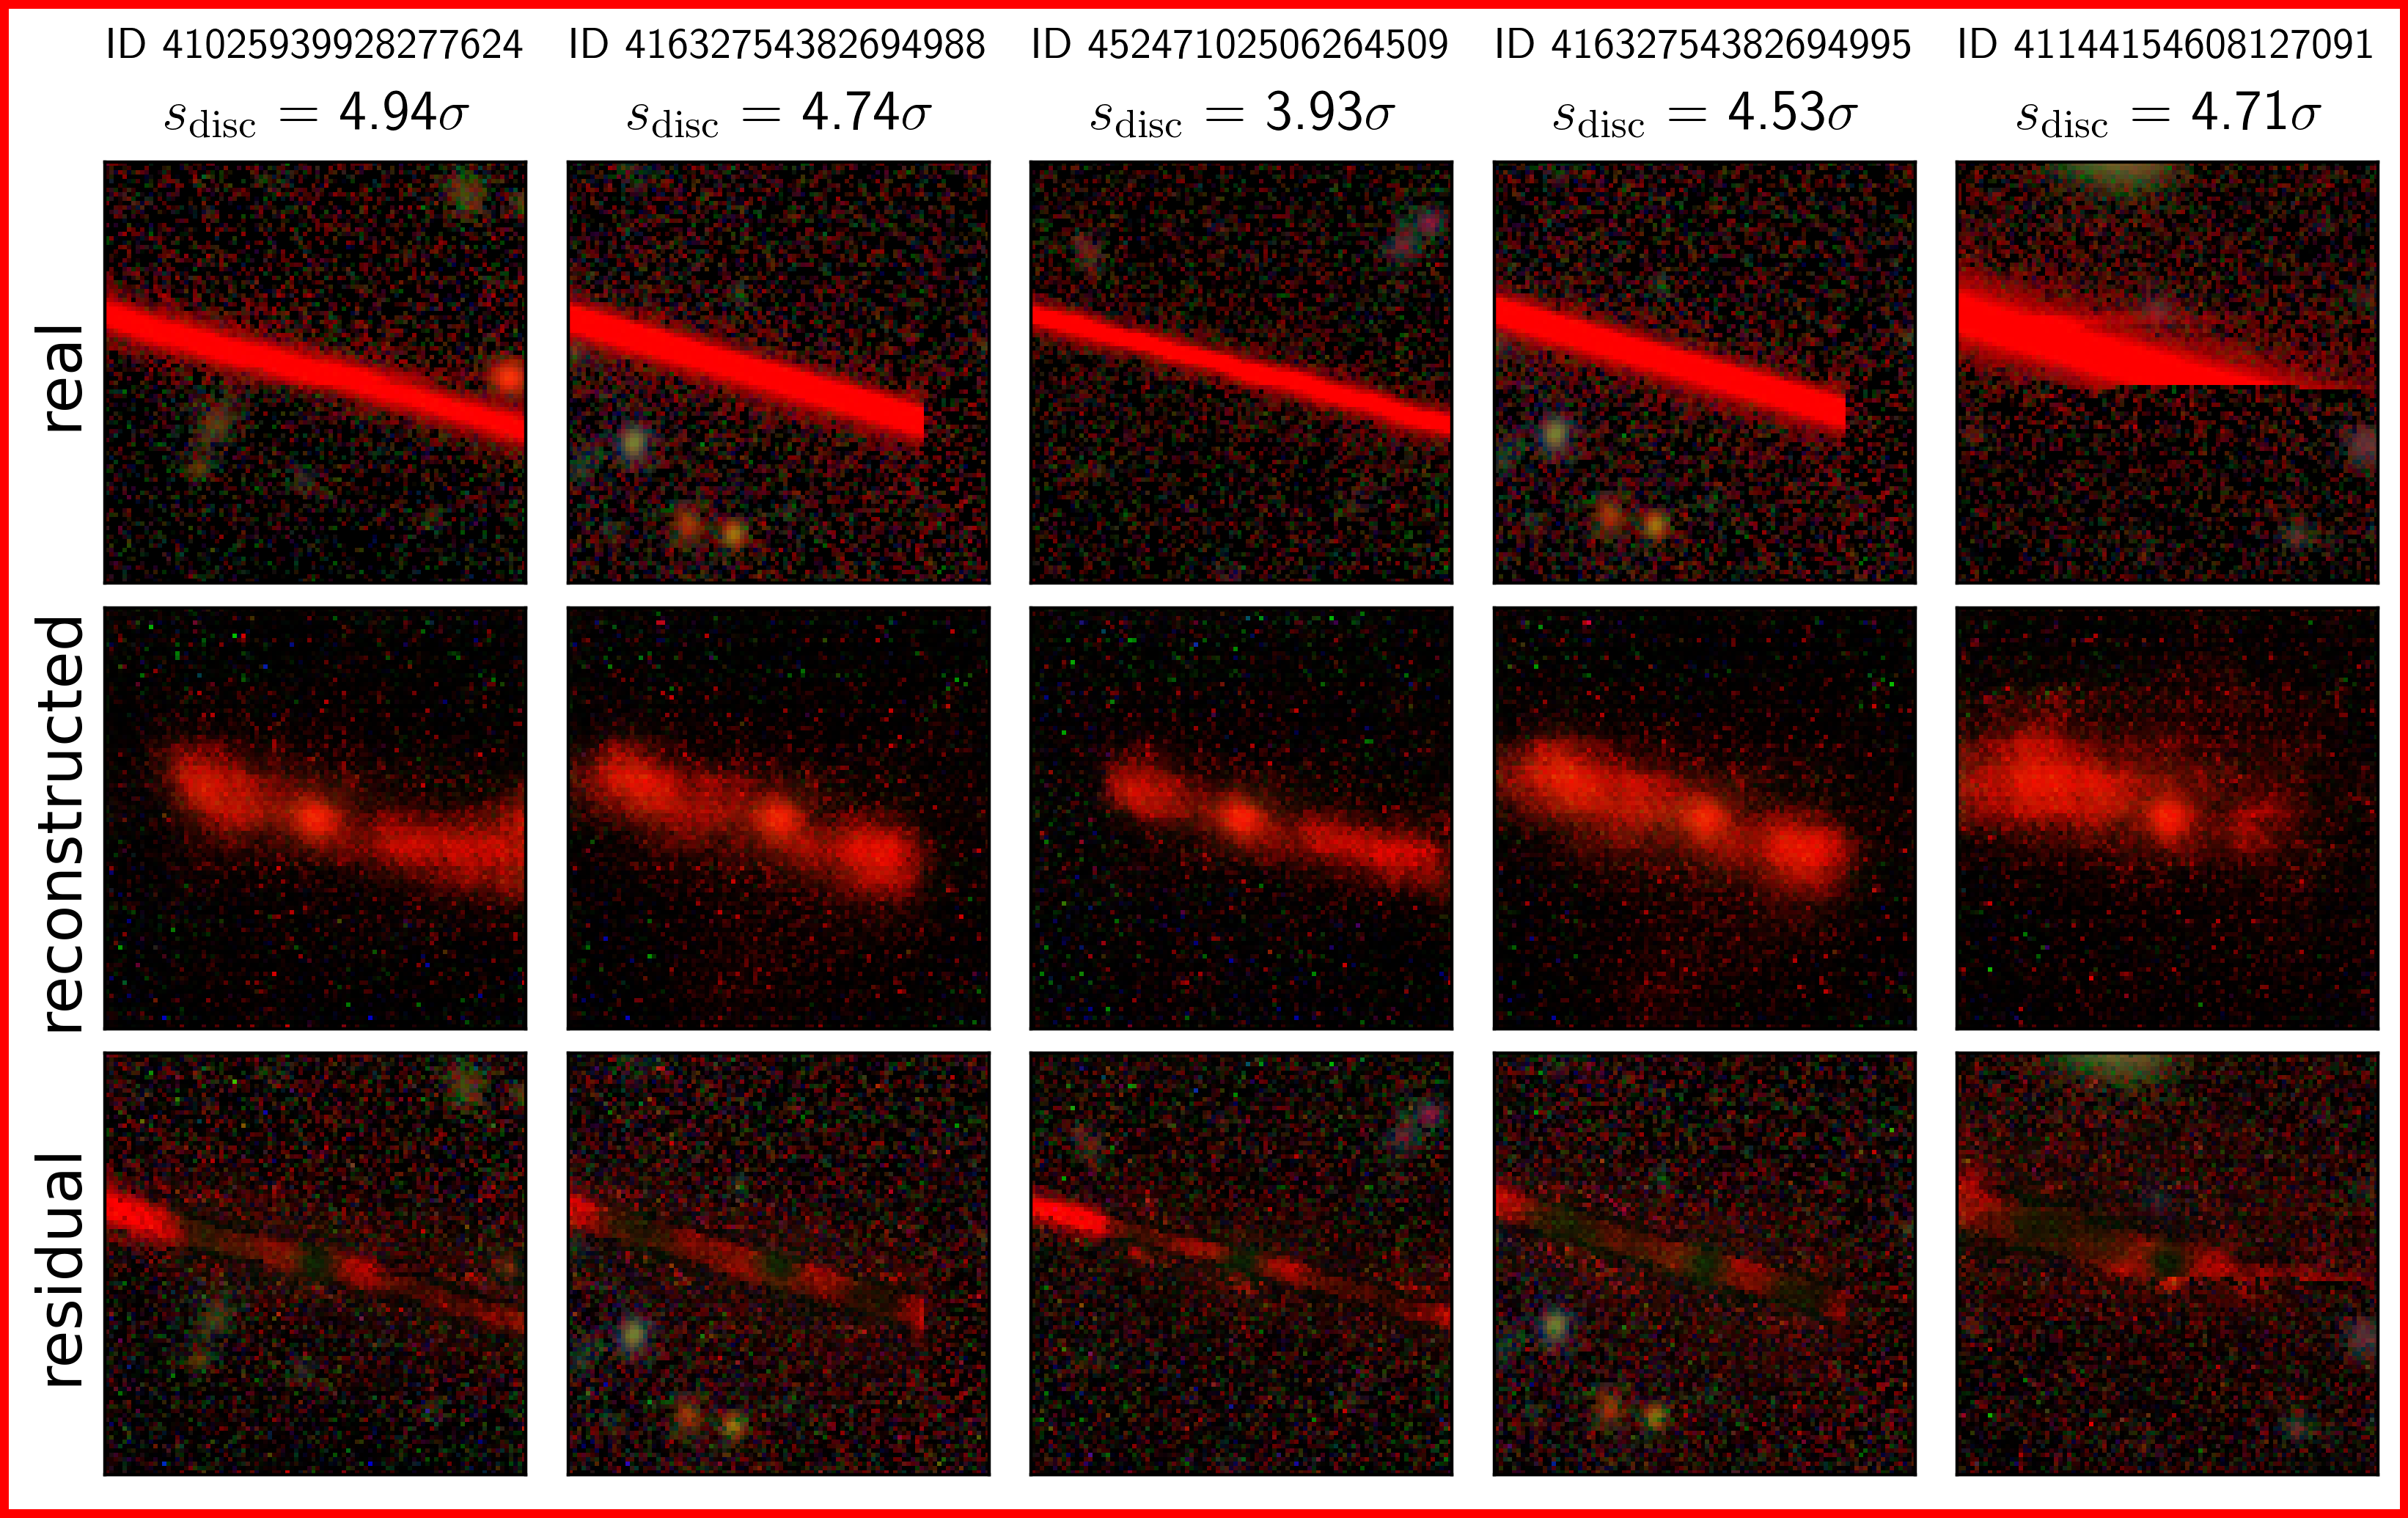

In [8]:
box_red = [2.5,3,-0.5,0]
bcolor_red = 'red'
idxs_box = utils.get_idxs_in_box(embedding_3sigd_auto_resid, box_red, n_ims, seed=42) #39
saveto = f'{plot_dir}/recons_box_{bcolor_red}.png'
imtag = 'gri'
restag = 'gri_lambda0.3'
plotter.plot_recons(idxs_box, imtag, restag, border_color=bcolor_red, saveto=saveto)

44


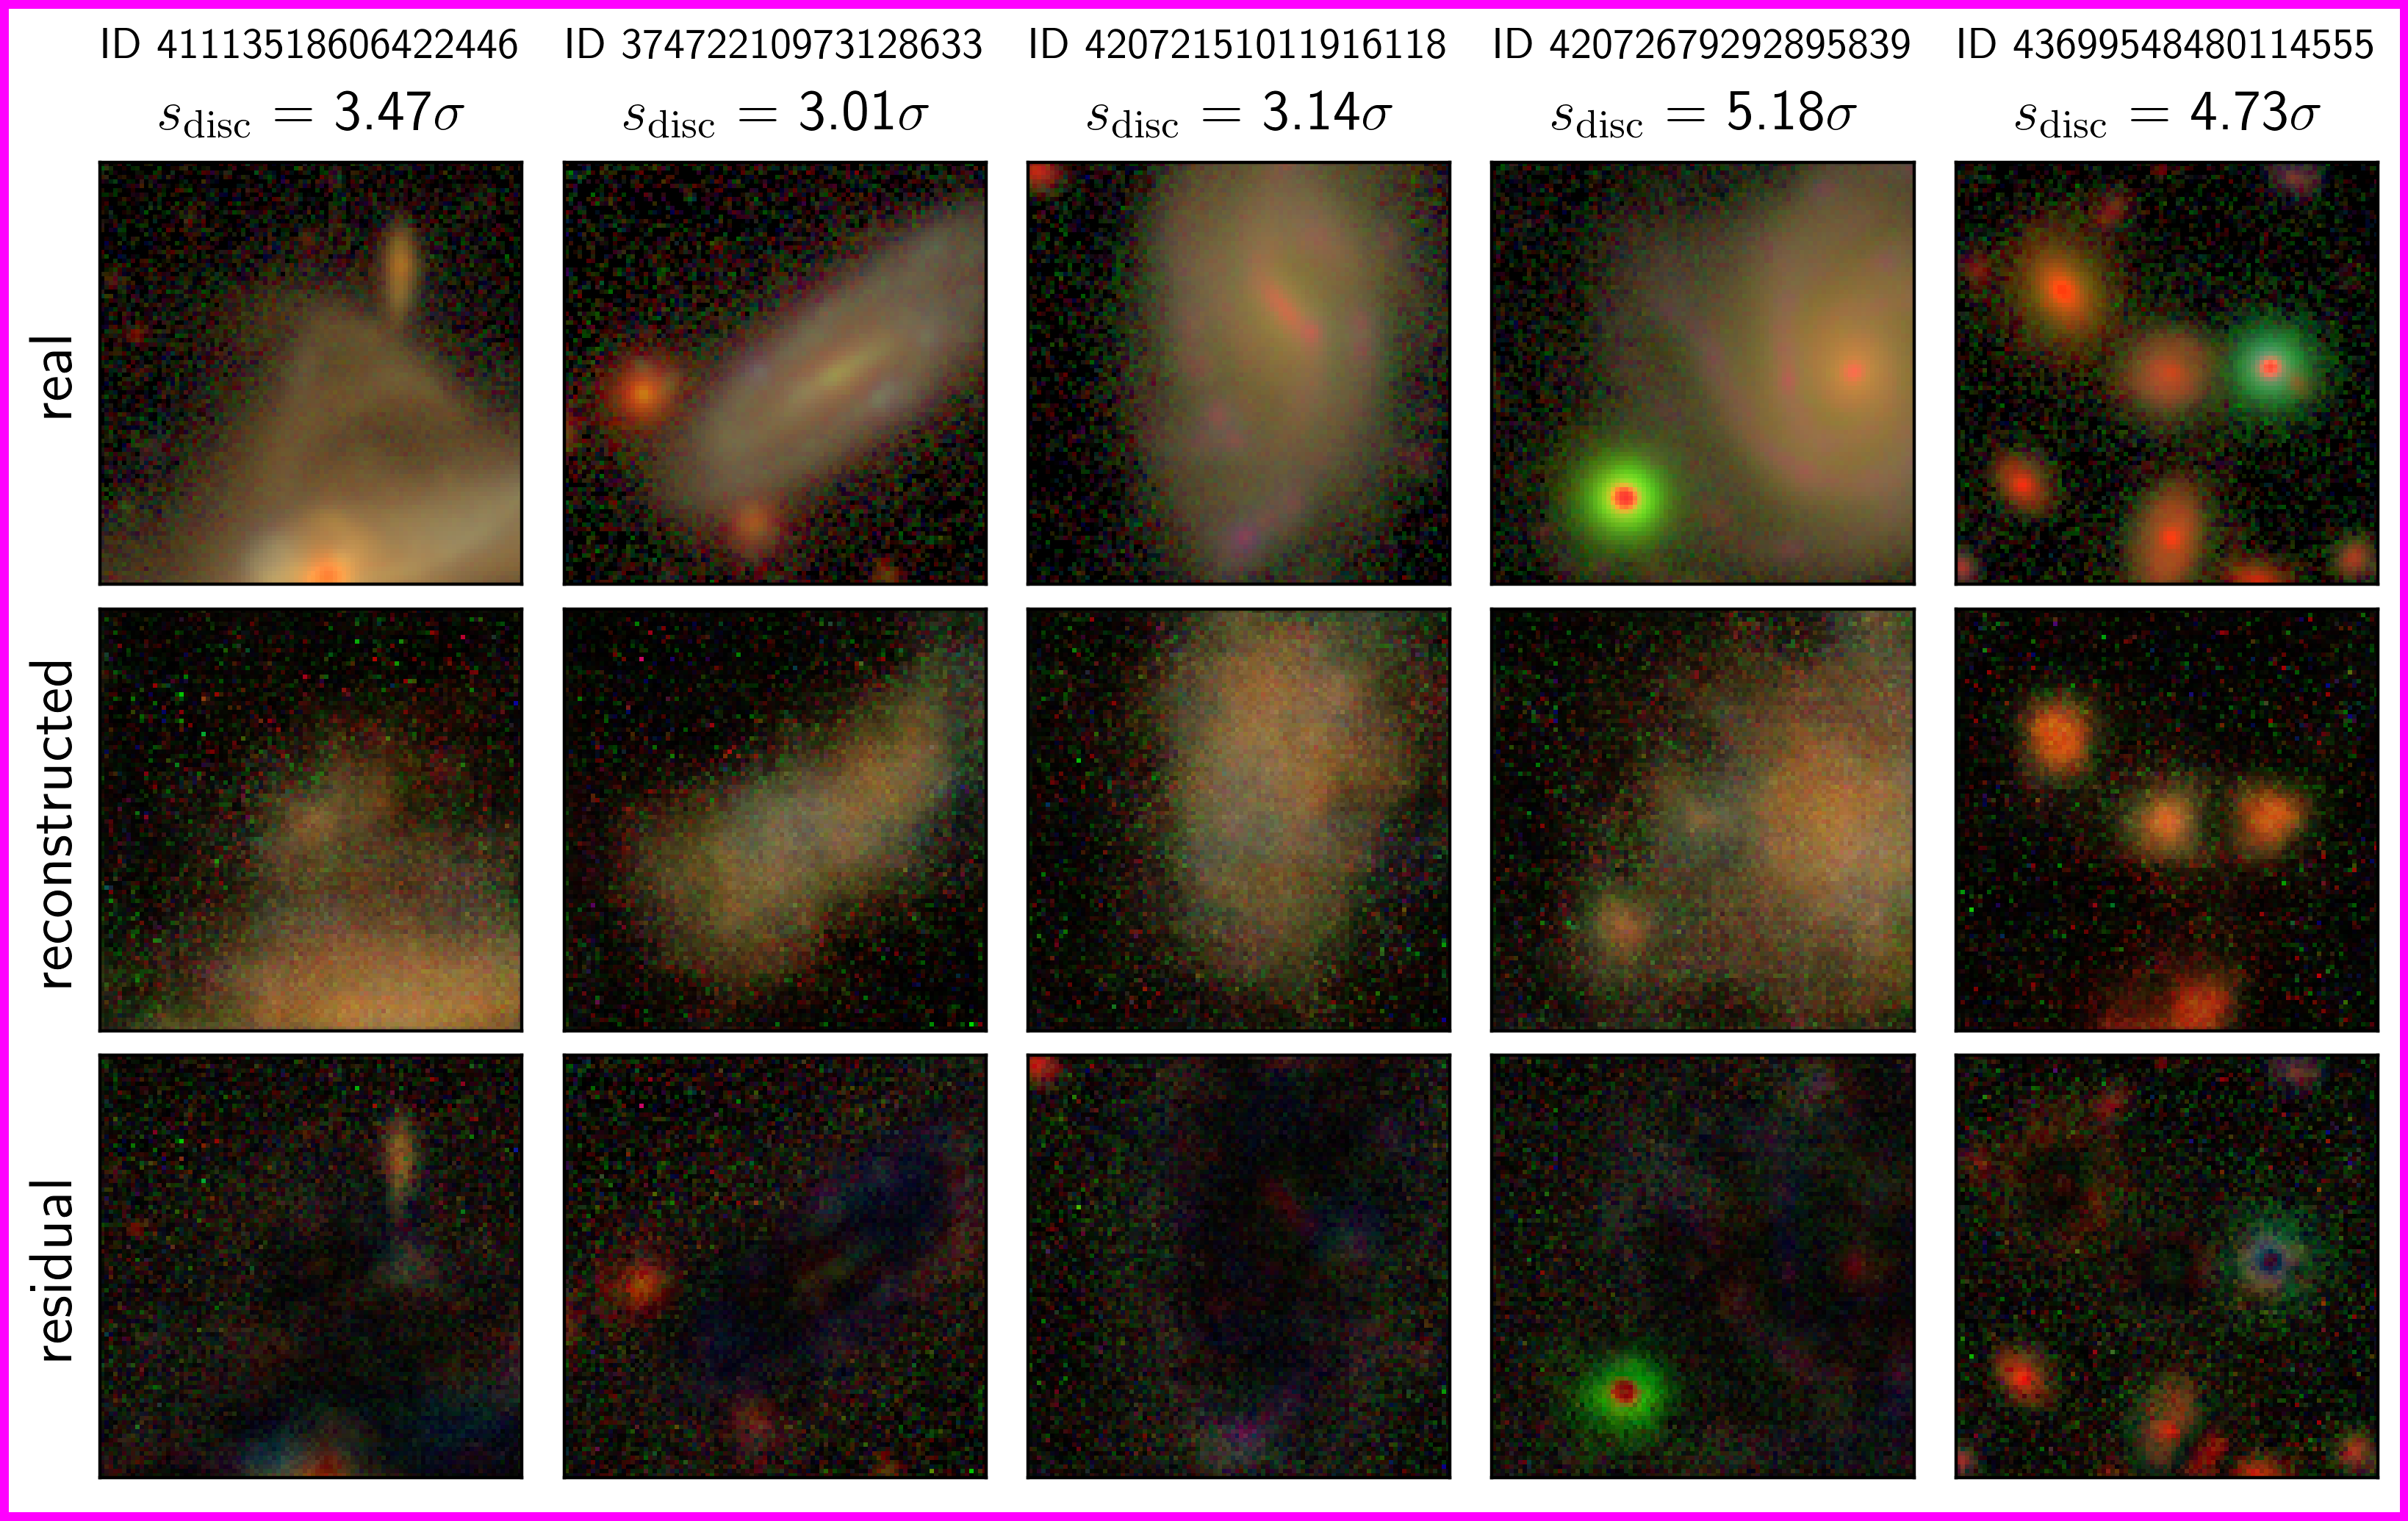

In [9]:
box_center = [7.5,8,5.75,6.25]
bcolor_center = 'magenta'
idxs_box = utils.get_idxs_in_box(embedding_3sigd_auto_resid, box_center, n_ims, seed=49) #49, 42
saveto = f'{plot_dir}/recons_box_{bcolor_center}.png'
imtag = 'gri'
restag = 'gri_lambda0.3'
plotter.plot_recons(idxs_box, imtag, restag, border_color=bcolor_center, saveto=saveto)

20


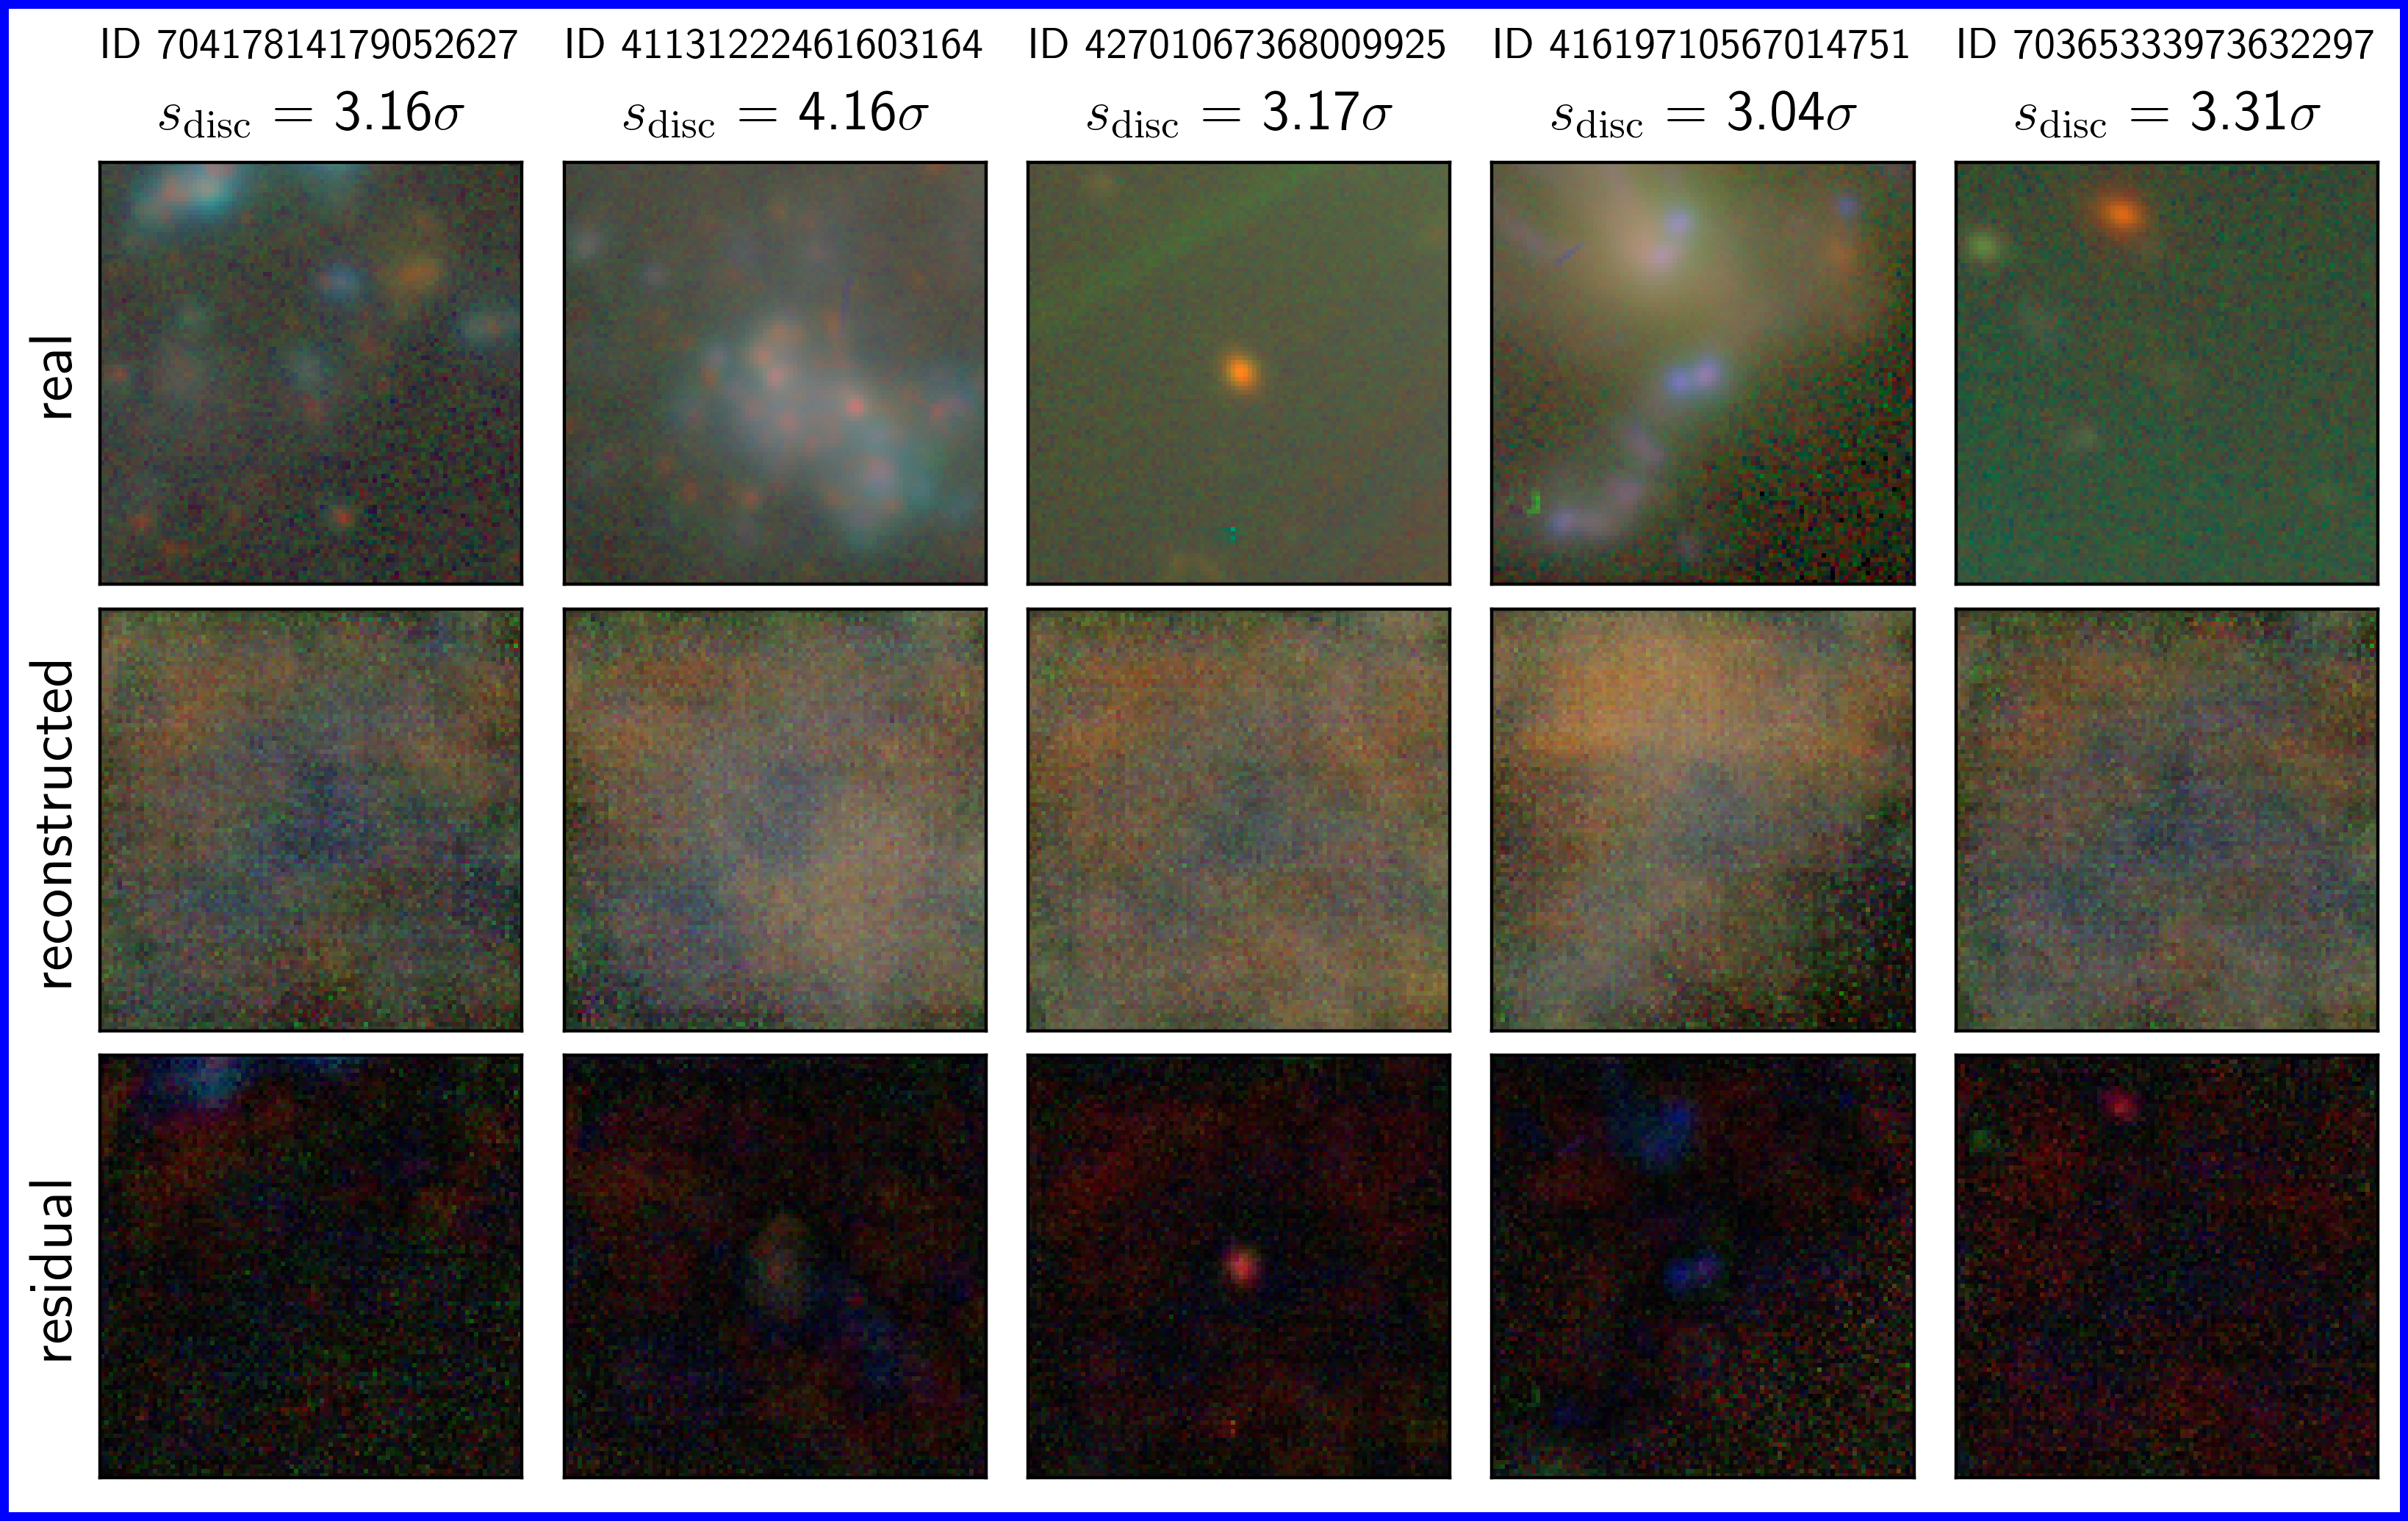

In [10]:
box_right = [13.75, 14.25, 1.75, 2.25]
bcolor_right = 'blue'
idxs_box = utils.get_idxs_in_box(embedding_3sigd_auto_resid, box_right, n_ims, seed=21) # 21!! 41, 43, 48, 40, 28, 25, 24
saveto = f'{plot_dir}/recons_box_{bcolor_right}.png'
imtag = 'gri'
restag = 'gri_lambda0.3'
plotter.plot_recons(idxs_box, imtag, restag, border_color=bcolor_right, saveto=saveto)

48


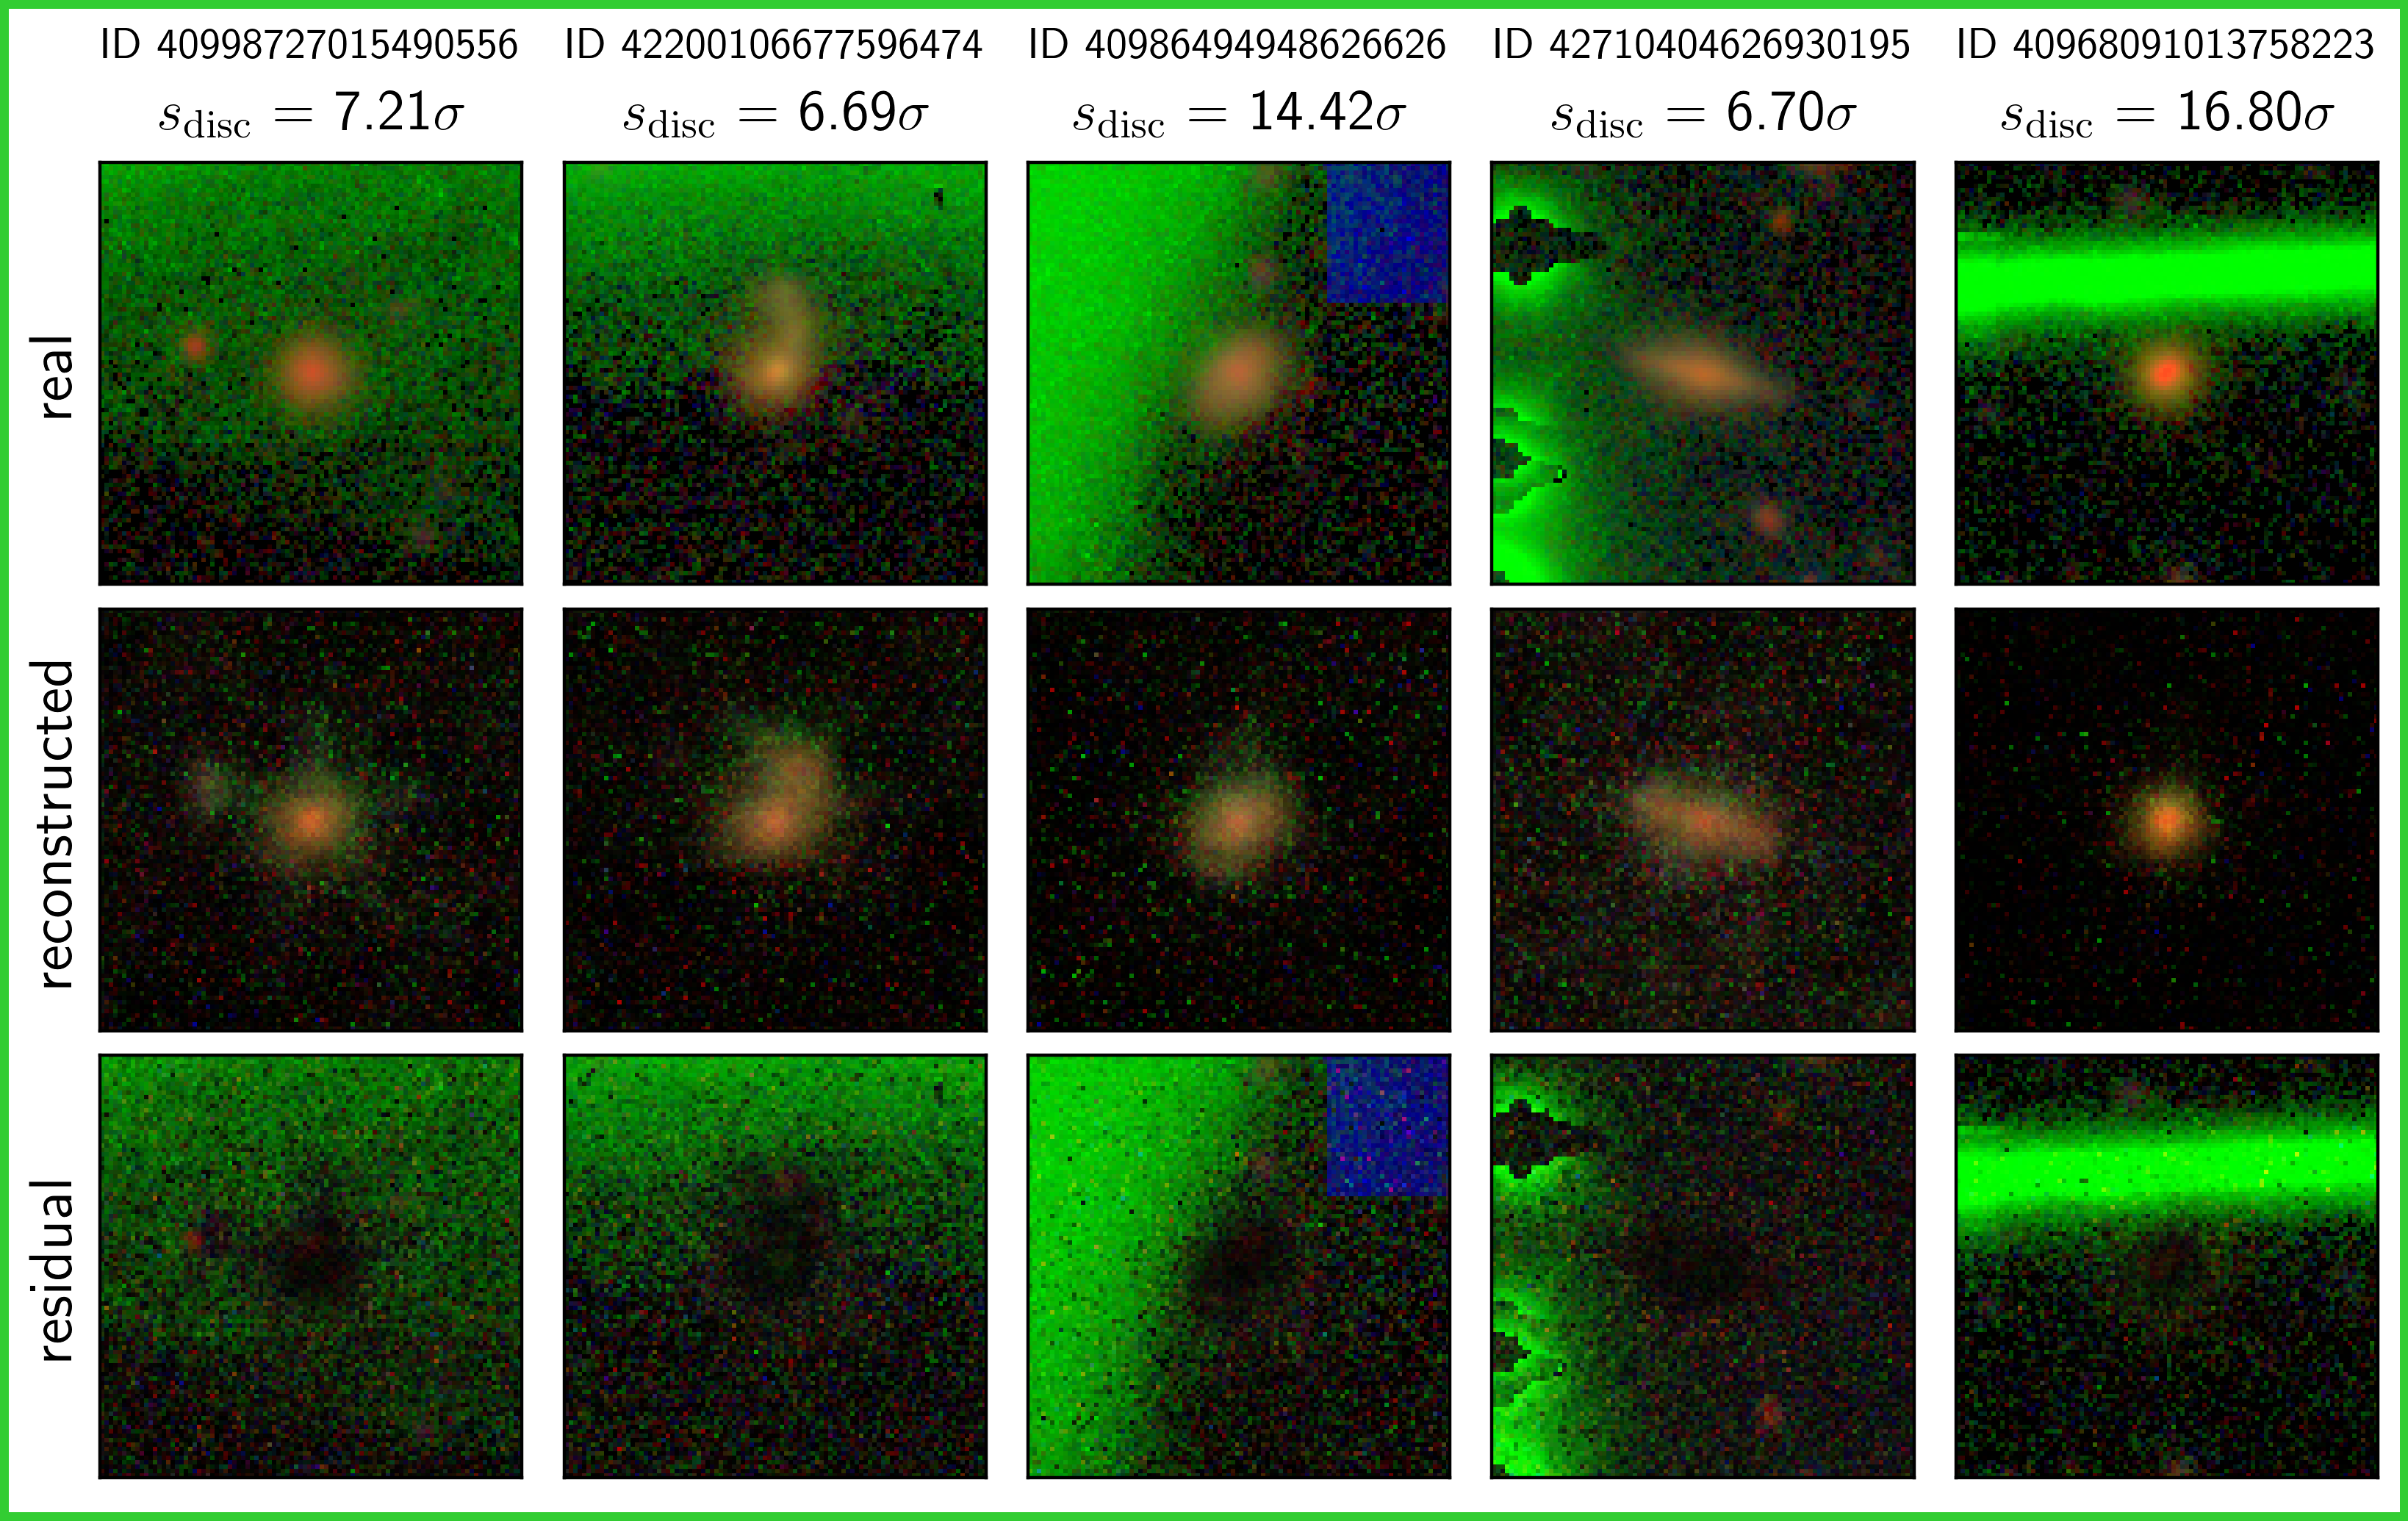

In [11]:
box_green = [11.5,12,-1.75,-1.25]
bcolor_green = 'limegreen'
idxs_box = utils.get_idxs_in_box(embedding_3sigd_auto_resid, box_green, n_ims, seed=42) #42
saveto = f'{plot_dir}/recons_box_{bcolor_green}.png'
imtag = 'gri'
restag = 'gri_lambda0.3'
plotter.plot_recons(idxs_box, imtag, restag, border_color=bcolor_green, saveto=saveto)

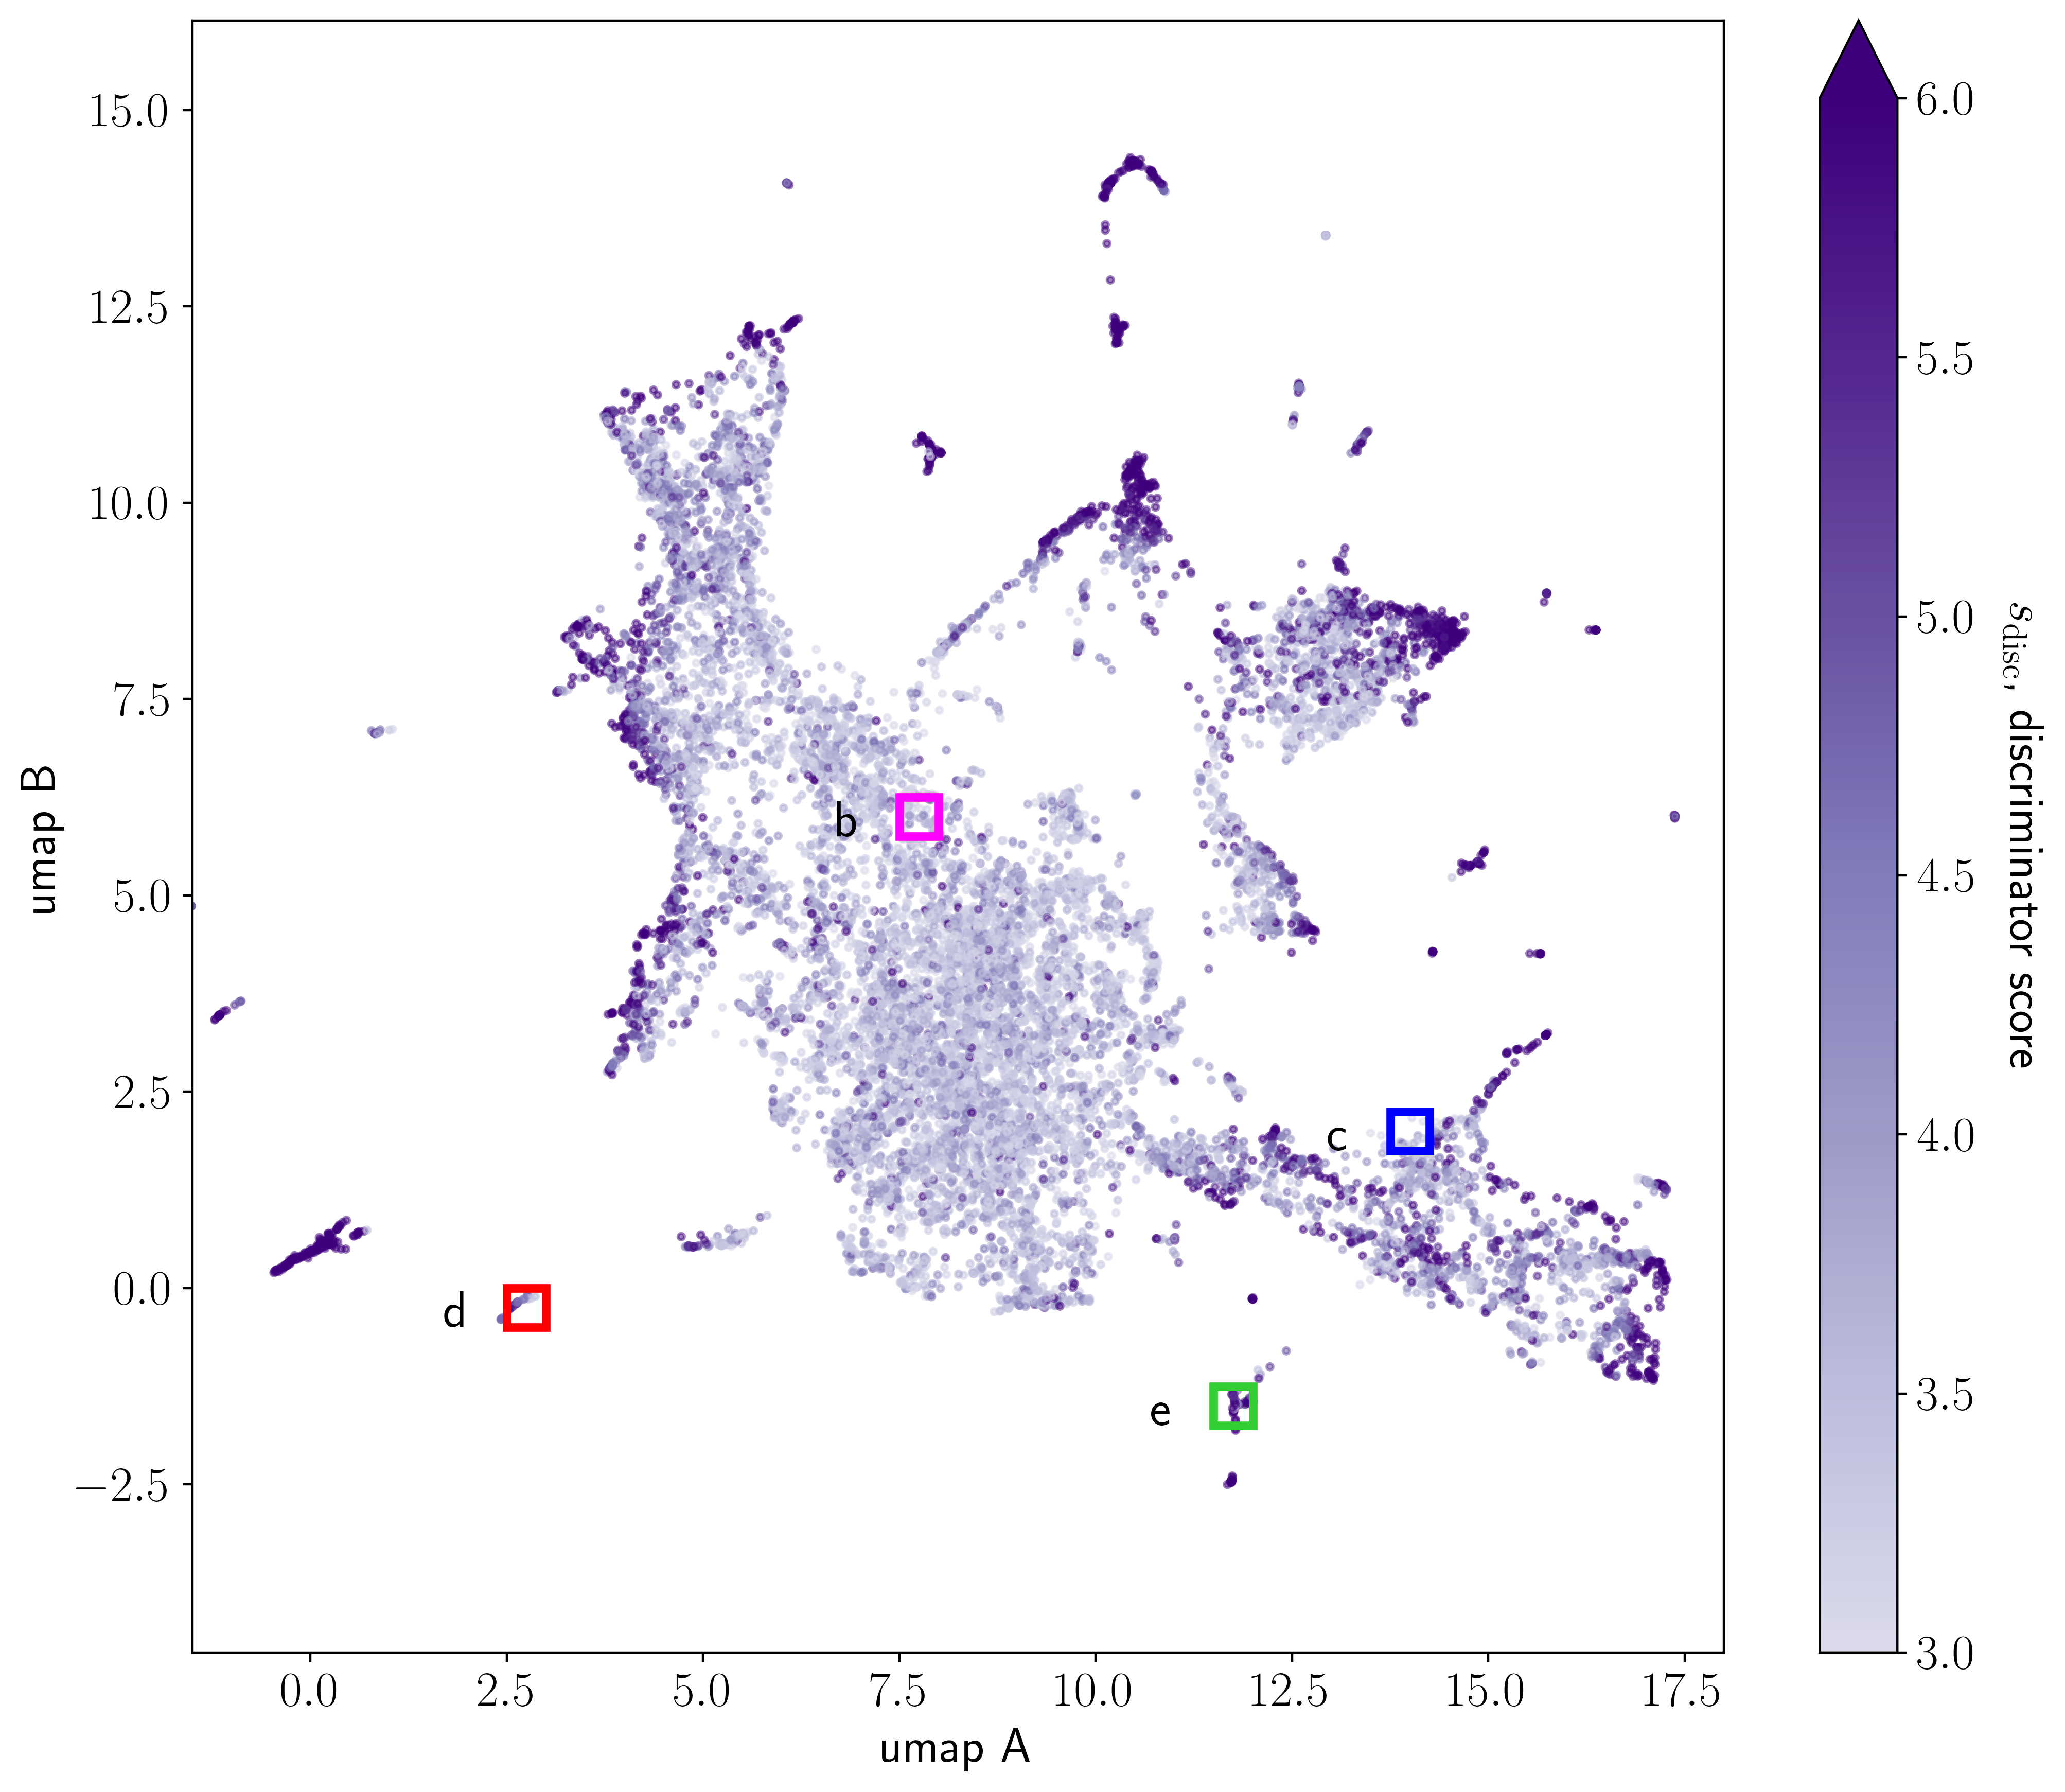

In [12]:
boxes = [box_center, box_right, box_red, box_green]
bcolors = [bcolor_center, bcolor_right, bcolor_red, bcolor_green]
blabels = ['b', 'c', 'd', 'e']
saveto = f'{plot_dir}/umap_3sigd_auto_resids_boxes.png'
ax = plotter.plot_umap(embedding_3sigd_auto_resid, boxes=boxes, box_colors=bcolors, box_labels=blabels,
                       cmap=cmap_purp, figsize=(12,10.5), alpha=0.5, s=20, xlim=[-1.5,18], ylim=[-4,15.5], 
                       saveto=saveto, vmin=3, vmax=6, show_axes=True, bigfont=True) # turn axes off bore saving final